# Logistic Regression

**Logistic Regression** is a statistical model that models the log-odds of an event as a linear combination of one or more independent variables. Unlike Linear Regression, it models the relationship using the logistic (sigmoid) function to ensure predicted probabilities fall between 0 and 1.

In a **machine learning** context, logistic regression is a **supervised algorithm** used commonly for classification tasks. It predicts a discrete label class but outputs probabilities that represent how confident the model is in its prediction.

The logistic function is defined as:

$$
\sigma(t) = \frac{1}{1+e^{-t}}
$$
$$
\text{where } t = \beta_0 + \beta_1x_1 + \dots + \beta_nx_n
$$

## Types of Logistic Regression
- **Binary Logistic Regression**: When the dependent variable has only two possible outcomes.
- **Multinomial Logistic Regression**: Where the dependent variable has three or more possible outcomes that are not ordered.
- **Ordinal Logistic Regression**: When the dependent variable has three or more possible outcomes that are ordered.

## When to Use, Not to Use, Pros and Cons
Logistic Regression is best used in cases where binary classification is the desired outcome of a predictive model. It is not ideal to use it in cases where the data is highly non-linear in nature.

**Pros**:
- Probabilistic
- Interpretable

**Cons**:
- Weak with nonlinear decision boundaries

## Binary Regression

Binary variables are widely used across statistics to model the probability of a certain class or event taking place. The logistic model is the most commonly used model for binary regression. Binary variables can be generalized to categorical variables when there are more than two possible values and the binary logistic regression can be generalized to multinomial logistic regression. If the multiple categories are ordered, ordinal logistic regression can be used. 

Logistic regression simply models probability of outcome and does not classifier, though a classifier can be made from the model by introducing a probability cutoff value to classify inputs with certain probability as a class.

## Background

### Logistic Function
The logistic function is a sigmoid function, which maps any real input $t$ to an output between 0 and 1. For the logit, this is interpreted as taking input log-odds and having output probability. The standard logisitic function $\sigma:\mathbb{R}\rightarrow(0,1)$ is defined as:
$$
\sigma(t) = \frac{e^t}{e^t+1}=\frac{1}{1+e^{-t}}
$$

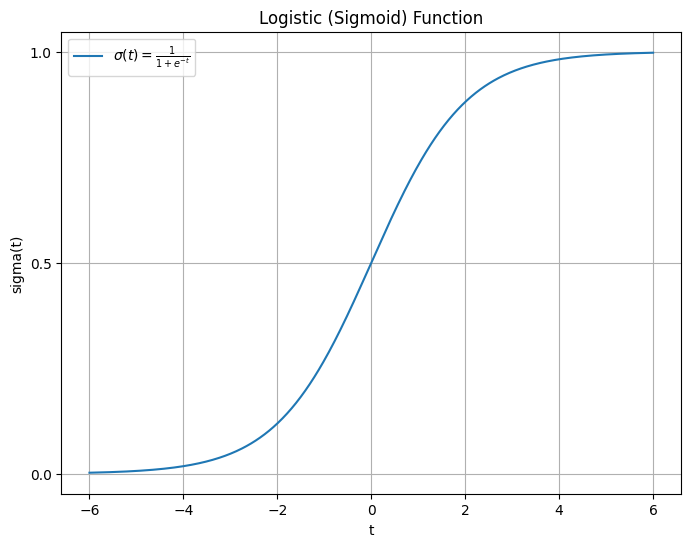

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(t):
    return 1 / (1 + np.exp(-t))

t = np.linspace(-6, 6, 500)
sigmoid_t = sigmoid(t)

plt.figure(figsize=(8,6))
plt.plot(t, sigmoid_t, label=r'$\sigma(t) = \frac{1}{1 + e^{-t}}$')
plt.title('Logistic (Sigmoid) Function')
plt.xlabel('t')
plt.ylabel('sigma(t)')
plt.yticks([0, 0.5, 1])
plt.grid()
plt.legend()
plt.show()

Let us assume that $t$ is a linear function of a single explanatory variable $x$. We can express $t$ as follows:

$$
t = \beta_0 + \beta_1x
$$

and the general logistic function $p:\mathbb{R}\rightarrow(0,1)$ can now be written as:

$$
p(x) = \sigma(x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1x)}}
$$

$p(x)$ is interpreted as the probability of the dependent variable $Y$ equaling a success rather than a failure. 

### Inverse of the Logistic Function
The logit (log-odds) function can be defined as the inverse $g=\sigma^{-1}$ of the standard logistic function.

$$
g(p(x)) = \sigma^{-1}(p(x)) = \textrm{logit } p(x) = \ln\left(\frac{p(x)}{1-p(x)}\right) = \beta_0 + \beta_1x
$$

### Definition of the Odds

The odds of the dependent variable equaling a case is equivalent to the exponential function of the linear regression expression. 

$$
\textrm{odds} = e^{\beta_0+\beta_1x}
$$

### Multiple Explanatory Variables
If there are multiple explanatory variables, the expression $\beta_0+\beta_1x$ can be revised to:

$$
\beta_0 + \sum_{i=1}^{m}\beta_ix_i
$$

resulting in a multiple linear regression with $m$ explanators.

## Assumptions
1. **Independent Observations**: Each data point is assumed to be independent of the others means there should be no correlation or dependence between the input samples.
2. **Binary Dependent Variables**: The dependent variable must be binary, meaning it can only take two values. For more than two categories, SoftMax functions are used.
3. **Linear relationship between independent variables and log odds**: The predictors affect the log odds in a linear way
4. **No Outliers**
5. **Large sample size**


## Model Fitting

The regression coefficients are usually estimated using **maximum likelihood estimation** (MLE). Unlike linear regression with normally distributed residuals, it is not possible to find a closed-form expression for the coefficient values that maximize the likelihood function so an iterative process must be used, e.g. Newton's method. This process begins with a tentative solution, revises it slightly to see if it can be improved, and repeats this revision until no more improvement is made, which is the point where the process is said to have converged.

Sometimes, the model may not converge. This indicates that the coefficients are not meaningful because the iterative process was unable to find appropriate solutions. This can occur for a multitude of reasons not covered in this notebook.

The log-likelihood function is expressed as:

$$
l(\beta) = \sum_{i=1}^{n}y_i\beta_i - \mathrm{log}(1+e^{\beta x_i})
$$

This can be optimized using any iterative method.

## Error and Significance of Fit
In any fitting proceedure, the addition of another fitting parameter will almost always improve the ability of the model to predict the measured outcomes. This will be true even if the additonal term has no predictive value, since the model will simply be "overfitting" to the noise in the data.

### Deviance
For logistic regression, a statistic known as the deviance is defined which is a measure of the error between the logistic model fit and the otucome data. In the limit of a large number of data points, the deviance is chi-square distributed, which allows a chi-square test to be implemented in order to determine the significance of the explanatory variables. 

Deviance is analogous to the sum of squares calculations in linear regressions and is a measure of the lack of fit to the data in a logistic regression model.

### Pseudo-R-squared
Can be used to assess goodness of fit for a logistic regression model

### Coefficient Signficance
In logistic regression, the regression coefficients represent the change in the logit for each unit change in the predictor. Given that the logit is not intuitive, researchers are more likely to focuse on a predictor's effect on the exponential function of the regression coefficient - the odds ratio. Tests to assess the significance of an individual predictor include the likelihood ratio test and the Wald statistic.

# Coding
In this section, we will implement an example binary logistic regression model and a multinomial one.

## Binary Logistic Model

In [3]:
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
df = load_breast_cancer(as_frame=True).frame
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
clf = LogisticRegression(max_iter=10000, random_state=42)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [15]:
acc = accuracy_score(y_test, clf.predict(X_test)) * 100
print(f'Model accuracy: {acc:.2f}%')

Model accuracy: 95.61%


## Multinomial Logistic Regression

In [24]:
from sklearn.datasets import load_digits

digits = load_digits()

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LogisticRegression(max_iter=10000, random_state=42).fit(X_train, y_train)

acc = reg.score(X_test, y_test) * 100

print(f'Model accuracy: {acc:.2f}%')

Model accuracy: 97.50%
